# Section 1:

I will be using the ECCO-TCP corpus (Eighteenth-Century Collections Online - Text Creation Partnership). This is made up of manual transcriptions of full texts from the works found in ECCO done at the Universities of Michigan and Oxford. ECCO is a collection of over 205,000 books, pamphlets, essays, and broadsides printed in the United Kingdom and the Americas during the eighteenth century. Though these works are searchable online with OCR, since they are old texts the OCR is not very accurate. This is where the ECCO-TCP project comes in, providing freely available transcriptions of 2,473 of these texts. I haven't been able to discover how they chose these specific texts, which is information I would like to track down to better understand how representative these titles are of eighteenth-century English language publishing. 

I was also thinking of using the available texts from the EEBO-TCP project, but as there are 25,368 of them I worry that this would make my project unwieldy. I would very much like your feedback on this. These texts are transciptions from the Early English Books Online, a collection of English language books and broadsides from the British Isles, British North America, and Europe printed from 1473 to 1700.  

I have found the full texts from both ECCO-TCP and EEBO-TCP here: http://graphics.cs.wisc.edu/WP/vep/vep-tcp-collection/

These are plain text files stripped of annotations and metadata. They are ready to be worked with; however, I would also like to figure out how to work with the metadata, especially since not all the titles include publishing dates within their text.

# Section 2:

Below, I embedded the TermsBerry tool from Voyant, using a text from my corpus titled "Remarks on the Scurvy as it Appeared Among the English Prisoners in France, in the Year 1795."  The tool shows high-frequency terms (the bigger the bubble, the more frequent the term) and their co-occurences. Hovering over a term displays its frequency in the document, and lights up the terms which collocate with it (within the window determined by the "context" slider at the bottom right). The collocate frequency is displayed on the lit-up collocate bubbles. 

For example, when the context slider is set to 3 (3 words on either side of the keyword) and we hover over "scorbutic" we can see that "scorbutic complaints" and "scorbutic patients" are collocates that appear 4 times each. 

In [2]:
from IPython.display import IFrame    
IFrame('https://voyant-tools.org/?corpus=7209e06022ea0c963c31b889eb867627&view=TermsBerry', width=600, height=600)

# Section 3:

Next I created a term frequency graph for this text. First I imported my text and tokenized it, made it lowercase, and removed stopwords and tokens that weren't words. I then determined the frequencies of the word tokens that were left.

In [3]:
import nltk

stopwords = nltk.corpus.stopwords.words("English")

with open ("K094222.000.txt", "r") as f: #read text into string
    scurvyString = f.read()
    
scurvyTokens = nltk.word_tokenize(scurvyString.lower()) #tokenize string, and make all letters lowercase

scurvyWords = [word for word in scurvyTokens \
               if word[0].isalpha() and word not in stopwords] #just keep tokens that are words, and filter out stopwords

scurvyFreqs = nltk.FreqDist(scurvyWords) #determine frequencies

scurvyFreqs.most_common(25) #show top 25 most common words

[('may', 49),
 ('much', 41),
 ('one', 39),
 ('scurvy', 31),
 ('even', 28),
 ('little', 28),
 ('could', 27),
 ('time', 26),
 ('disease', 25),
 ('however', 24),
 ('upon', 24),
 ('though', 24),
 ('perhaps', 23),
 ('every', 23),
 ('often', 23),
 ('salt', 23),
 ('many', 23),
 ('must', 22),
 ('well', 21),
 ('state', 21),
 ('first', 20),
 ('opium', 19),
 ('use', 19),
 ('would', 19),
 ('two', 19)]

Next I generated a term frequency graph from this information.

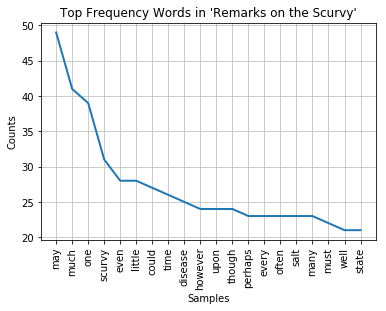

In [7]:
scurvyFreqs.plot(20, title="Top Frequency Words in 'Remarks on the Scurvy'")

I wanted to recreate this graph without a few of the words, so I created a new stopwords list:

In [5]:
list = ["may", "even", "could", "however", "though"]

stopwords2 = stopwords + list

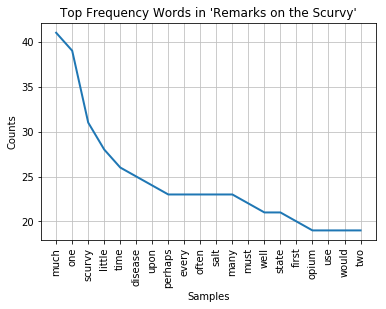

In [6]:
scurvyWords2 = (word for word in scurvyWords if word not in stopwords2)
scurvyFreqs2 = nltk.FreqDist(scurvyWords2)

scurvyFreqs2.plot(20, title="Top Frequency Words in 'Remarks on the Scurvy'")